In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib_venn import venn2,venn3
from matplotlib.patches import Patch
import sys
from matplotlib_venn import venn3_unweighted

sys.path.append('../retrosynthesis/')
# sys.path.append('../')

from common import *


In [2]:
#input
# yeast870_path =  '../../Data/model/yeast-GEM.mat'
sce_gene_clean_ec = '../../Data/Saccharomyces_cerevisiae_teacher_maxsep.csv'
DeepEC_path = '../../Data/Sce_DeepECv2.txt'
sce_uniprotkb_gene_file = '../../Data/uniprot/uniprotkb_organism_id_559292_2023_11_08.tsv'

#output
figS4a_path = '../../Results/Figures/figS4-a.pdf'
figS4b_path = '../../Results/Figures/figS4-b.pdf'
figS3a_path = '../../Results/Figures/figS3-a.pdf'
figS3b_path = '../../Results/Figures/figS3-b.pdf'


# different cut-off, different top number

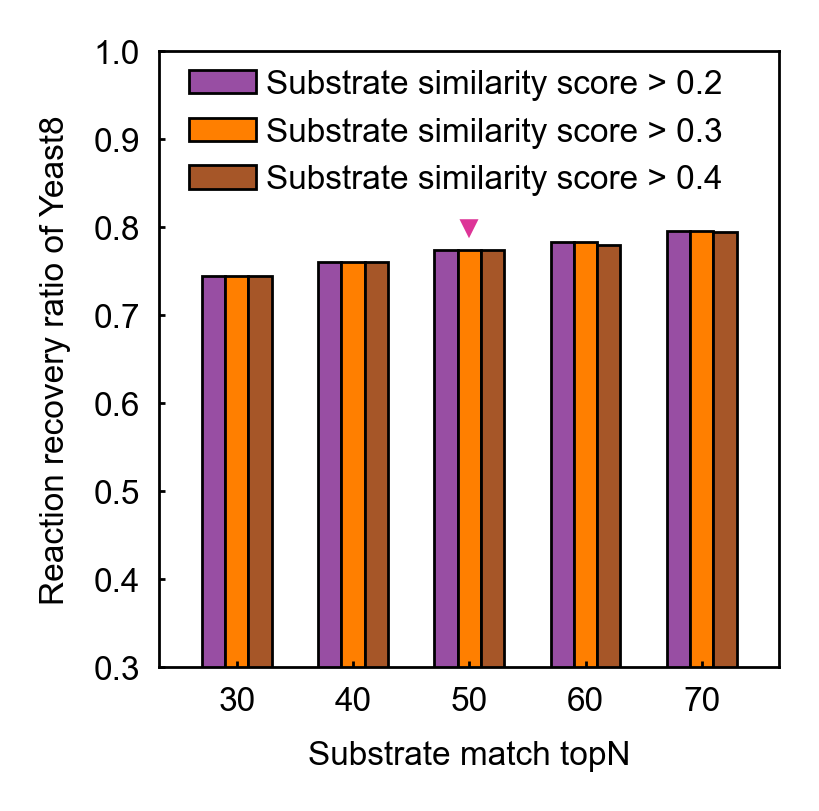

In [14]:


# Set general parameters
plt.figure(figsize=(2, 2), dpi=400)
plt.rcParams.update({'font.size': 6})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42

# Set axis styles
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)

# Data
labels = [ '30', '40', '50', '60', '70']
data1 = [ 0.744, 0.760, 0.774, 0.783, 0.796] 
data2 = [0.744, 0.760, 0.774, 0.783, 0.796] 
data3 = [0.744, 0.760, 0.774, 0.780, 0.794]

# Create bar chart
# Create bar chart
width = 0.3
positions = [1, 2.5, 4, 5.5, 7]

plt.bar([p - width for p in positions], data1, color='#984ea3', width=width, edgecolor='black', linewidth=0.5, label='Substrate similarity score > 0.2')
plt.bar(positions, data2, color='#ff7f00', width=width, edgecolor='black', linewidth=0.5, label='Substrate similarity score > 0.3')
plt.bar([p + width for p in positions], data3, color='#a65628', width=width, edgecolor='black', linewidth=0.5, label='Substrate similarity score > 0.4')

# Set axis parameters
plt.tick_params(axis='y', direction='in', width=0.5, which='both', length=1)
plt.tick_params(axis='x', direction='in', width=0.5, which='both', length=1)
plt.xlim(0, 8)
plt.ylim(0.3, 1)

# Set x-axis labels
plt.xticks(positions, labels)

# Set labels and title
plt.xlabel('Substrate match topN', fontsize=6)
plt.ylabel('Reaction recovery ratio of Yeast8', fontsize=6)

# Draw red inverted triangle
plt.plot(4, 0.8, marker='v', color='#dd3497', markersize=1.8)  # marker='v' indicates an inverted triangle

# Add legend
plt.legend(frameon=False, fontsize=6, loc='upper left', bbox_to_anchor=(0, 1.02), labelspacing=0.5, handletextpad=0.3)

# Save the figure
plt.savefig(figS3a_path, dpi=400, bbox_inches='tight')

# Show the figure
plt.show()

# Running time of different parameters 
# S3-b

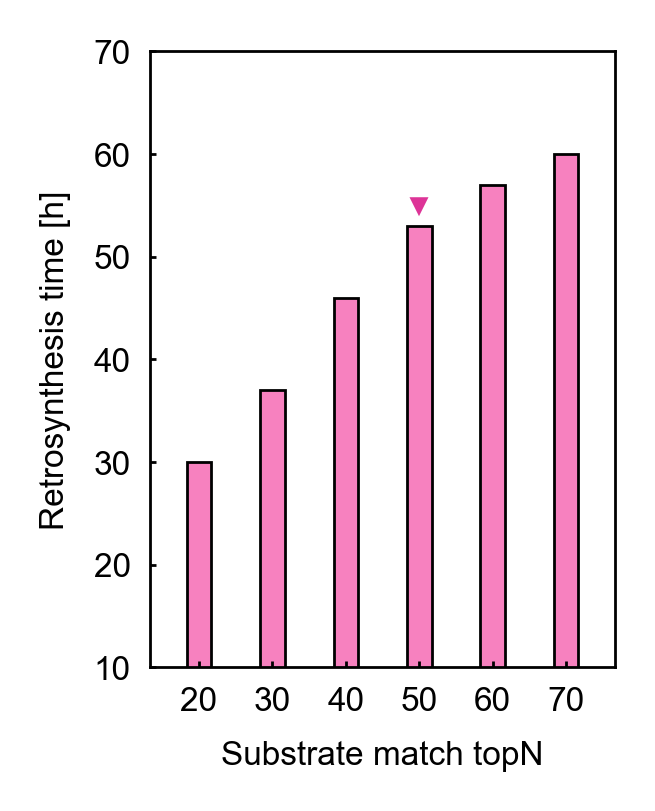

In [4]:

# Set general parameters
plt.figure(figsize=(1.5, 2), dpi=400)
plt.rcParams.update({'font.size': 6})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42

# Set axis styles
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)

# Data
labels = ['20', '30', '40', '50', '60', '70']
data2 = [30, 37, 46, 53, 57, 60] 

# Create bar chart
width = 0.5
plt.bar([1, 2.5, 4, 5.5, 7, 8.5], data2, color='#f781bf', width=width, edgecolor='black', linewidth=0.5, label='Substrate similarity score > 0.4')

# Set axis parameters
plt.tick_params(axis='y', direction='in', width=0.5, which='both', length=1)
plt.tick_params(axis='x', direction='in', width=0.5, which='both', length=1)
plt.xlim(0, 9.5)
plt.ylim(10, 70)

# Set x-axis labels
plt.xticks([1, 2.5, 4, 5.5, 7, 8.5], labels)

# Set labels and title
plt.xlabel('Substrate match topN', fontsize=6)
plt.ylabel('Retrosynthesis time [h]', fontsize=6)

# Draw red inverted triangle
plt.plot(5.5, 55, marker='v', color='#dd3497', markersize=1.8)  # marker='v' indicates an inverted triangle

# Add legend (commented out)
# plt.legend(frameon=False, fontsize=6, loc='upper left', bbox_to_anchor=(0, 1.02), labelspacing=0.5, handletextpad=0.3)

# Save the figure
plt.savefig(figS3b_path, dpi=400, bbox_inches='tight')

# Show the figure
plt.show()

# gene set venn of different prediction methods s4-b

In [5]:
clean_gene2ec_dict = get_gene2ec_dict_clean(sce_gene_clean_ec)
clean_ec2gene_dict = get_ec2gene_dict_clean(clean_gene2ec_dict)
print(len(clean_ec2gene_dict))
clean_ec2gene_dict

187


{'5.3.99': ['YDL204W',
  'YNR040W',
  'YLR455W',
  'YPR028W',
  'YNL149C',
  'YGR082W',
  'YGR183C',
  'YKL117W',
  'YMR173W',
  'YGR174C',
  'YBR106W',
  'YML081C-A',
  'YBR230C',
  'YOR020W-A',
  'YOL165C',
  'YDR233C',
  'YER083C',
  'YMR072W',
  'YNL070W',
  'YHR073W'],
 '2.3.2': ['YNL167C',
  'YDR170C',
  'YDR177W',
  'YHR121W',
  'YLR145W',
  'YOR161C',
  'YLR224W',
  'YIL097W',
  'YPL007C',
  'YPL199C',
  'YDR397C',
  'YDR073W',
  'YOR064C',
  'YFR052W',
  'YIR011C',
  'YJR141W',
  'YDR398W',
  'YBR082C',
  'YFL009W',
  'YCR087C-A',
  'YBL047C',
  'YGL049C',
  'YJL048C',
  'YLR283W',
  'YMR269W',
  'YCL039W',
  'YLL006W',
  'YKR082W',
  'YJR090C',
  'YHL044W',
  'YOR077W',
  'YGL058W',
  'YLR099W-A',
  'YMR153W',
  'YDL161W',
  'YLR337C',
  'YBR258C',
  'YDL058W',
  'YJL036W',
  'YHR090C',
  'YDL233W',
  'YLR323C',
  'YPR125W',
  'YDL209C',
  'YLR045C',
  'YMR021C',
  'YLR268W',
  'YLR078C',
  'YML091C',
  'YOR269W',
  'YOL054W',
  'YEL043W',
  'YLR073C',
  'YGR159C',
  'YCR009C

In [6]:
DeepEC_gene2ec_dict = get_gene2ec_dict_DeepEC(DeepEC_path)
DeepEC_ec2gene_dict = get_ec2gene_dict_DeepEC(DeepEC_gene2ec_dict)
print(len(DeepEC_ec2gene_dict))
DeepEC_ec2gene_dict

142


{'2.7.11': ['YNL167C',
  'YPR161C',
  'YPL042C',
  'YDR490C',
  'YPL203W',
  'YFL009W',
  'YLR358C',
  'YFR014C',
  'YNR047W',
  'YCR008W',
  'YBL105C',
  'YHR030C',
  'YPL009C',
  'YOR351C',
  'YPL248C',
  'YPR054W',
  'YNL195C',
  'YHR102W',
  'YHR135C',
  'YBR059C',
  'YDL189W',
  'YGL179C',
  'YLR410W-B',
  'YOL100W',
  'YKL171W',
  'YDL017W',
  'YLL021W',
  'YOR119C',
  'YCR091W',
  'YBL100W-B',
  'YHR159W',
  'YDL025C',
  'YDR485C',
  'YPL140C',
  'YDR477W',
  'YOR231W',
  'YDR034C-D',
  'YBR097W',
  'YJL010C',
  'YER032W',
  'YDL108W',
  'YOR358W',
  'YOR098C',
  'YLR310C',
  'YDL211C',
  'YML114C',
  'YIL095W',
  'YOL016C',
  'YLR371W',
  'YPL031C',
  'YOL027C',
  'YKL166C',
  'YOR233W',
  'YDR507C',
  'YCR067C',
  'YPR109W',
  'YDR523C',
  'YNL161W',
  'YGL117W',
  'YER008C',
  'YMR144W',
  'YLR320W',
  'YDR122W',
  'YMR001C',
  'YBL016W',
  'YDR147W',
  'YJR059W',
  'YNL172W',
  'YNL091W',
  'YOR032C',
  'YDR247W',
  'YNL298W',
  'YNL197C',
  'YJL164C',
  'YDR466W',
  'YPR111

In [7]:

def venn_CLEAN_DeepECtransformer_Uniprotgene(sce_uniprotkb_gene_file,gene2ec_dict1,gene2ec_dict2,label1,label2,gene_lst_venn_figure):
    gene2ec_dict1 = list(gene2ec_dict1.keys())
    print(label1,'gene2ec_dict',len(gene2ec_dict1))

    gene2ec_dict2 = list(gene2ec_dict2.keys())
    print(label2,'gene2ec_dict',len(gene2ec_dict2))

    uniprot_data = pd.read_csv(sce_uniprotkb_gene_file,sep='\t')
    uniprot_data = uniprot_data[~uniprot_data['EC number'].isna()]
    uniprot_data = uniprot_data[~uniprot_data['Gene Names'].isna()]
    uniprot_gene_list = []
    for i in uniprot_data['Gene Names'].to_list():
        uniprot_gene_list += i.split(' ')
    uniprot_gene_list = [x for x in uniprot_gene_list if x.startswith('Y') or x.startswith('Q')]
    uniprot_gene_list = [x for x in uniprot_gene_list if len(x)>4]
    uniprot_gene_list = [x for x in uniprot_gene_list if '.' not in x]

    uniprot_gene_list = [x for x in uniprot_gene_list if x in gene2ec_dict2]

    print('uniprot gene num',len(uniprot_gene_list))

    A = set(gene2ec_dict1)
    B = set(gene2ec_dict2)
    C = set(uniprot_gene_list)
    # set common parameters
    plt.figure(figsize=(2, 2), dpi=400)
    plt.rcParams.update({'font.size': 7})
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['pdf.fonttype']= 42

    # plot Venn diagram
    venn_labels = [label1, label2, 'UniProt']
    venn_diagram = venn3_unweighted([A, B, C], set_labels=venn_labels)
    venn_diagram.get_patch_by_id('100').set_facecolor('#ff7f00')
    venn_diagram.get_patch_by_id('100').set_edgecolor('black')
    venn_diagram.get_patch_by_id('100').set_alpha(1)
    venn_diagram.get_patch_by_id('100').set_linewidth(1)

    venn_diagram.get_patch_by_id('010').set_facecolor('#984ea3')
    venn_diagram.get_patch_by_id('010').set_edgecolor('black')
    venn_diagram.get_patch_by_id('010').set_alpha(1)
    venn_diagram.get_patch_by_id('010').set_linewidth(1)

    venn_diagram.get_patch_by_id('001').set_facecolor('#41ab5d')
    venn_diagram.get_patch_by_id('001').set_edgecolor('black')
    venn_diagram.get_patch_by_id('001').set_alpha(1)
    venn_diagram.get_patch_by_id('001').set_linewidth(1)

    venn_diagram.get_patch_by_id('111').set_facecolor('#1d91c0')
    venn_diagram.get_patch_by_id('111').set_edgecolor('black')
    venn_diagram.get_patch_by_id('111').set_alpha(1)
    venn_diagram.get_patch_by_id('111').set_linewidth(1)

    venn_diagram.get_patch_by_id('011').set_edgecolor('black')
    venn_diagram.get_patch_by_id('011').set_alpha(1)
    venn_diagram.get_patch_by_id('011').set_linewidth(1)

    venn_diagram.get_patch_by_id('101').set_edgecolor('black')
    venn_diagram.get_patch_by_id('101').set_alpha(1)
    venn_diagram.get_patch_by_id('101').set_linewidth(1)

    venn_diagram.get_patch_by_id('110').set_edgecolor('black')
    venn_diagram.get_patch_by_id('110').set_alpha(1)
    venn_diagram.get_patch_by_id('110').set_linewidth(1)

    venn_diagram.set_labels[0].set_fontsize(7)
    venn_diagram.set_labels[0].set_color('#ff7f00')
    venn_diagram.set_labels[0].set_alpha(1)
    venn_diagram.set_labels[1].set_fontsize(7)
    venn_diagram.set_labels[1].set_color('#984ea3')
    venn_diagram.set_labels[1].set_alpha(1)
    venn_diagram.set_labels[2].set_fontsize(7)
    venn_diagram.set_labels[2].set_color('#41ab5d')
    venn_diagram.set_labels[2].set_alpha(1)

    # save figure
    plt.savefig(gene_lst_venn_figure, dpi=400, bbox_inches='tight')
    plt.show()   

DeepECtransformer gene2ec_dict 2015
CLEAN gene2ec_dict 5911
uniprot gene num 1781


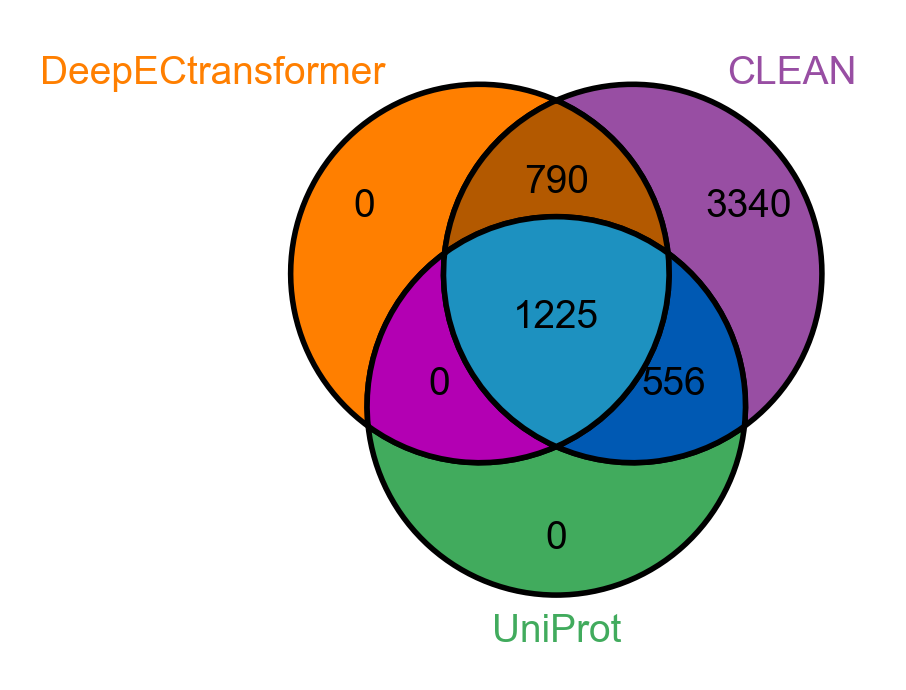

In [8]:
gene_lst_venn_figure = figS4a_path
venn_CLEAN_DeepECtransformer_Uniprotgene(sce_uniprotkb_gene_file,DeepEC_gene2ec_dict,clean_gene2ec_dict,'DeepECtransformer','CLEAN',gene_lst_venn_figure)

# new gene strategy：clean+deepec

# GPR recovery ratio

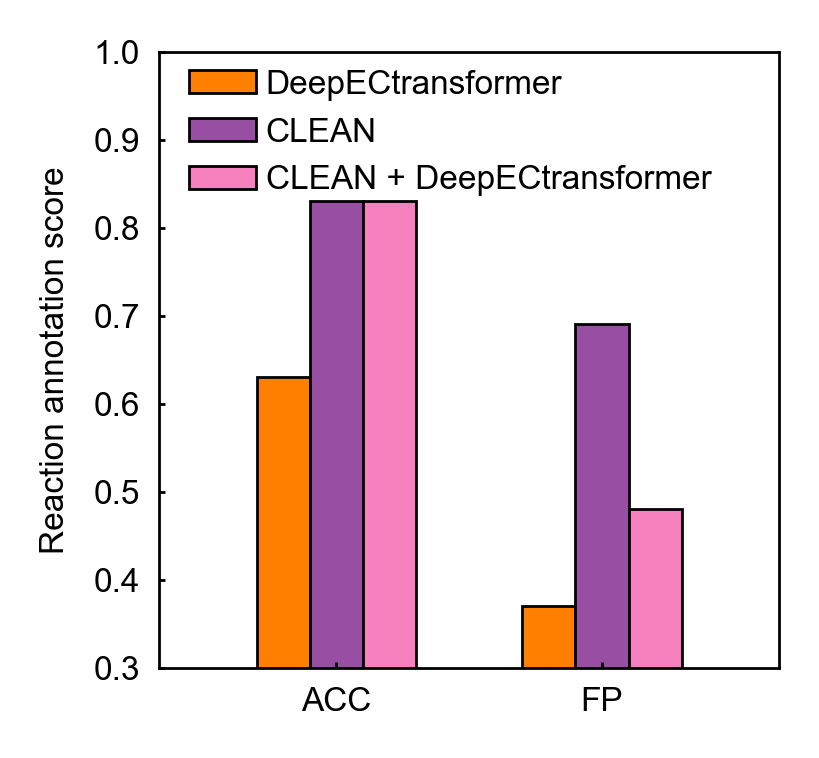

In [9]:
# Set general parameters
plt.figure(figsize=(2, 2), dpi=400)
plt.rcParams.update({'font.size': 6})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42

# Set axis styles
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)

# Data
labels = ['ACC', 'FP']
data1 = [0.63, 0.37]
data2 = [0.83, 0.69]
data3 = [0.83, 0.48]

# Create bar chart
width = 0.3

plt.bar([1 - width, 2.5 - width], data1, color='#ff7f00', width=width, edgecolor='black', linewidth=0.5, label='DeepECtransformer')
plt.bar([1, 2.5], data2, color='#984ea3', width=width, edgecolor='black', linewidth=0.5, label='CLEAN')
plt.bar([1 + width, 2.5 + width], data3, color='#f781bf', width=width, edgecolor='black', linewidth=0.5, label='CLEAN + DeepECtransformer')

# Set axis parameters
plt.tick_params(axis='y', direction='in', width=0.5, which='both', length=1)
plt.tick_params(axis='x', direction='in', width=0.5, which='both', length=1)
plt.xlim(0, 3.5)
plt.ylim(0.3, 1)

# Set x-axis labels
plt.xticks([1, 2.5], labels)

# Set labels and title
# plt.xlabel('Reaction annotation', fontsize=6)
plt.ylabel('Reaction annotation score', fontsize=6)

# Add legend
plt.legend(frameon=False, fontsize=6, loc='upper left', bbox_to_anchor=(0, 1.02), labelspacing=0.5, handletextpad=0.3)

# Save the figure
plt.savefig(figS4b_path, dpi=400, bbox_inches='tight')

# Show the figure
plt.show()